In [5]:
"""unknown_wave.ipynb"""
# Cell 1: copied from fourier_discrete.ipynb

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget

max_freq: int = 40

# fmt: off

def dft(ts: NDArray[np.float_],
        ys: NDArray[np.float_]
    )-> tuple[NDArray[np.float_], NDArray[np.float_]]:
    num_samples: int = ts.size
    num_terms: int = int(num_samples / 2)  # Nyquist limit

    a_cos: NDArray[np.float_] = np.zeros(num_terms)
    b_sin: NDArray[np.float_] = np.zeros(num_terms)

    for term in range(0, num_terms):
        a: float = 0.0
        b: float = 0.0
        for sample in range(0, num_samples):
            a += 2 * np.cos(term * ts[sample]) * ys[sample]
            b += 2 * np.sin(term * ts[sample]) * ys[sample]
        a_cos[term] = round(a / num_samples, 8) + 0
        b_sin[term] = round(b / num_samples, 8) + 0

    a_cos[0] /= 2
    b_sin[0] /= 2

    return a_cos, b_sin


def idft(a_cos: NDArray[np.float_], b_sin: NDArray[np.float_],
         ts: NDArray[np.float_]) -> NDArray[np.float_]:
    num_terms: int = a_cos.size
    num_points: int = ts.size
    yr: NDArray[np.float_] = np.zeros(num_points)

    for point in range(0, num_points):
        for term in range(0, num_terms):
            yr[point] += a_cos[term] * np.cos(term * ts[point]) + b_sin[term] * np.sin(
                term * ts[point]
            )

    return yr


def power_spec(a_cos: NDArray[np.float_],
               b_sin: NDArray[np.float_]) -> NDArray[np.float_]:
    num_terms: int = a_cos.size
    ps: NDArray[np.float_] = np.zeros(num_terms, dtype=np.float_)
    for term in range(0, num_terms):
        ps[term] = np.sqrt(a_cos[term] ** 2 + b_sin[term] ** 2)
    return ps

# fmt: on


def plot_samples(ts: NDArray[np.float_], ys: NDArray[np.float_], ax: Axes) -> None:
    ax.set_title(f"Sampled Wave ({ts.size} samples)")

    ax.set_xlabel("time", loc="right")
    ax.set_ylabel("amplitude")

    ax.axhline(y=0.0, color="lightgray", linewidth=1)

    # fmt: off
    ax.plot(ts, ys, color="lightgray",
            marker="o", markerfacecolor="none",
            markersize=1, markeredgecolor="black")
    # fmt: on

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def plot_dft(a_cos: NDArray[np.float_], b_sin: NDArray[np.float_], ax: Axes) -> None:
    ax.set_title("Discrete Fourier Transform")

    ax.set_xlabel("frequency", loc="right")
    ax.set_ylabel("amplitude")

    highest_freq: int
    if max_freq:
        highest_freq = max_freq
    else:
        highest_freq = (
            max(int(np.amax(np.nonzero(a_cos))), int(np.amax(np.nonzero(b_sin)))) + 1
        )

    # fmt: off
    
    ax.bar(range(0, highest_freq), a_cos[:highest_freq],
           label="cosine", color="blue", zorder=2)
    
    ax.bar(range(0, highest_freq), b_sin[:highest_freq],
           label="sine", color="red", zorder=2)

    # fmt: on

    ax.legend(loc="best")

    ax.grid(which="major", axis="x", color="black", linewidth=1)
    ax.grid(which="minor", axis="x", color="lightgray", linewidth=1)
    ax.grid(which="major", axis="y", color="black", linewidth=1)
    ax.grid(which="minor", axis="y", color="lightgray", linewidth=1)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    for i in range(highest_freq):
        if a_cos[i] != 0:
            ax.text(i, a_cos[i], i, size=10)
        if b_sin[i] != 0:
            ax.text(i, b_sin[i], i, size=10)


def plot_idft(ts: NDArray[np.float_], yr: NDArray[np.float_], ax: Axes) -> None:
    ax.set_title(f"Inverse DFT ({ts.size} samples)")

    ax.set_xlabel("time", loc="right")
    ax.set_ylabel("amplitude")

    ax.axhline(y=0.0, color="lightgray")

    ax.plot(ts, yr, color="purple", linewidth=2)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def plot_powerspec(ps: NDArray[np.float_], ax: Axes) -> None:
    ax.set_title("Power Spectrum")

    ax.set_xlabel("frequency", loc="right")
    ax.set_ylabel(r"$\Vert amplitude \Vert$")

    highest_freq: int
    if max_freq:
        highest_freq = max_freq
    else:
        highest_freq = int(np.amax(np.nonzero(ps))) + 1

    ax.bar(range(0, highest_freq), ps[:highest_freq], color="green", zorder=2)

    ax.grid(which="major", axis="x", color="black", linewidth=1)
    ax.grid(which="minor", axis="x", color="lightgray", linewidth=1)
    ax.grid(which="major", axis="y", color="black", linewidth=1)
    ax.grid(which="minor", axis="y", color="lightgray", linewidth=1)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def analyze(file_name: str) -> None:
    samples: NDArray[np.float_] = np.genfromtxt(file_name, delimiter=",")
    ts: NDArray[np.float_] = samples[:, 0]
    ys: NDArray[np.float_] = samples[:, 1]

    a_cos: NDArray[np.float_]
    b_sin: NDArray[np.float_]
    a_cos, b_sin = dft(ts, ys)
    yr: NDArray[np.float_] = idft(a_cos, b_sin, ts)
    ps: NDArray[np.float_] = power_spec(a_cos, b_sin)

    plt.close("all")
    plt.figure(file_name, constrained_layout=True)

    plot_samples(ts, ys, plt.subplot(221))
    plot_dft(a_cos, b_sin, plt.subplot(222))
    plot_idft(ts, yr, plt.subplot(223))
    plot_powerspec(ps, plt.subplot(224))

    plt.show()

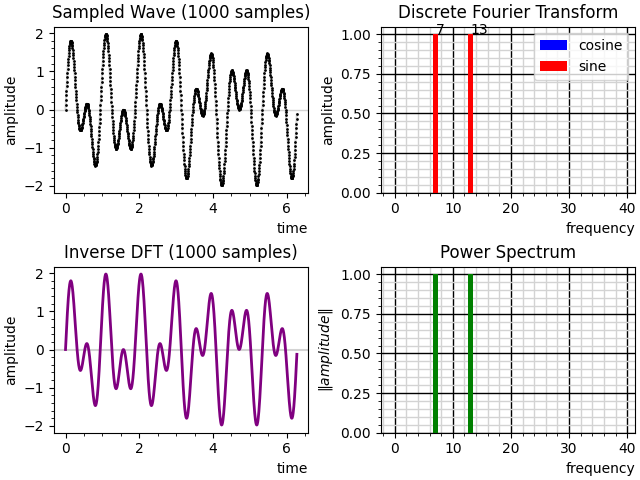

In [6]:
analyze("unknown_wave.csv")

By the sum-to-product identity for sine (sin(a) + sin(b) = 2 sin((a+b)/2) cos((a-b)/2)).
a = 13, b = 7 --> y = 2\*sin(10)\*cos(3) --> alpha = 10, beta = 3